##PH870 Assignment-1
Adithi Sadananda Upadhya <br>
191EC101

####Installing qiskit-textbook from github 

In [1]:
!pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/qiskit-community/qiskit-textbook.git to /tmp/pip-req-build-tf7nfvp0
  Running command git clone -q https://github.com/qiskit-community/qiskit-textbook.git /tmp/pip-req-build-tf7nfvp0
     |████████████████████████████████| 1.6 MB 6.9 MB/s 
     |████████████████████████████████| 6.7 MB 57.8 MB/s 
     |████████████████████████████████| 18.0 MB 24.0 MB/s 
     |████████████████████████████████| 240 kB 80.6 MB/s 
     |████████████████████████████████| 54 kB 3.9 MB/s 
     |████████████████████████████████| 112 kB 102.7 MB/s 
     |████████████████████████████████| 943 kB 86.0 MB/s 
     |████████████████████████████████| 49 kB 8.1 MB/s 
     |████████████████████████████████| 49 kB 7.3 MB/s 
     |████████████████████████████████| 37.5 MB 1.2 MB/s 
     |████████████████████████████████| 1.6 MB 60.9 MB/s 
     |████████████████████████████████| 4.1 MB 52.0 MB/s

In [2]:
!pip install pylatexenc #for 'mpl' - matplotlib drawer in qc.draw()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 162 kB 7.1 MB/s 
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136835 sha256=6497144911e818e690b9bb78b23bf2da8a30095cb0f70e107b9c47acbf2da7ed
  Stored in directory: /root/.cache/pip/wheels/f1/8a/f5/33ee79d4473eb201b519fa40f989b842e373237395a3421f52
Successfully built pylatexenc


In [3]:
import qiskit.tools.jupyter

In [4]:
%qiskit_version_table

###LAB 1 : QUANTUM CIRCUITS

In [5]:
#importing the required modules 
from qiskit import *
from qiskit.visualization import plot_histogram
import numpy as np

####Part-1: Classical logic gates with quantum circuits

(1) NOT Gate 

In [6]:
#function NOT takes one argument as input, and returns the computed NOT value of the input.
def NOT(input):
  qc = QuantumCircuit(1,1) #creates a quantum circuit with 1 qubit and 1 classical bit
  qc.reset(0) #reset the quantum bits to their default state
  #qubit state |0⟩ is denoted with '0' and '1' for |1⟩

  #setting the input state:
  #if input is 1, change input state |0⟩ to |1⟩, as the default state of the input is |0⟩
  if input == '1':
    qc.x(0) #x() flips the value on qubit q[0] 

  qc.barrier() #barrier between operations

  #not operation on input:
  qc.x(0) #flip the value on qubit q[0]

  qc.barrier()

  #measurement(collapsing to its eigen state):
  #extract the 0/1 value from the qubit q[0] and encode it to classical bit c[0]
  qc.measure(0,0)

  #create a new simulator object to run the program
  backend = Aer.get_backend('aer_simulator') #create an instance of the aer_simulator
  job = backend.run(qc, shots=1, memory=True)
  output = job.result().get_memory()[0] 

  return qc,output


NOT gate
NOT of 1 is 0


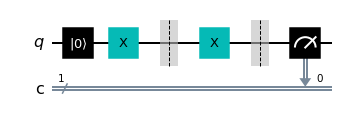



NOT of 0 is 1


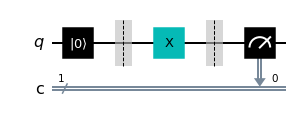

In [7]:
#sample inputs 
print('NOT gate')
for i in ['1','0']:
  qc,out = NOT(i)
  print('NOT of',i,'is',out)
  display(qc.draw('mpl')) #draw the quantum circuit, use matplotlib for rendering
  print('\n')

(2) XOR gate (CNOT)

In [34]:
#function XOR takes two inputs as arguments, returns one output which holds the reuslt of xor(inp1,inp2)
def XOR(input1, input2):
  #qubit 0 -> input 1
  #qubit 1 -> input 2
  #output-measured from qubit 1
  
  qc = QuantumCircuit(2,1) #circuit with 2 quantum bits and 1 classsical bit
  qc.reset(range(2)) #reset the qubits to default state
  #setting the input states:
  if input1=='1':
    qc.x(0)
  if input2=='1':
    qc.x(1)
  qc.barrier()
  #xor computation using CNOT gate:
  ''' control target -> output 
      0 0 -> 0 
      0 1 -> 1
      1 0 -> 1
      1 1 -> 0
  as seen above, it can be observed this xor functionality is similar to the truth table of CNOT gate. '''
  qc.cx(0,1)  #cnot controlled by qubit 0 and targetting qubit 1
  qc.barrier()
  qc.measure(1,0) #output from qubit 1 is measured
  backend = Aer.get_backend('aer_simulator') #creating an instance of the aer_simulator
  job = backend.run(qc, shots=1, memory=True)
  output = job.result().get_memory()[0]
  return qc,output

XOR with inputs 0 0 gives 0


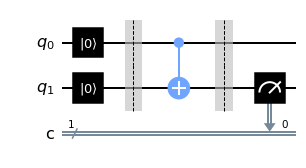



XOR with inputs 0 1 gives 1


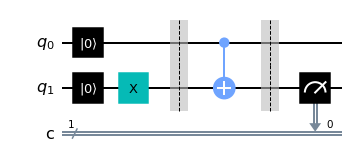



XOR with inputs 1 0 gives 1


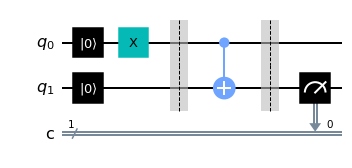



XOR with inputs 1 1 gives 0


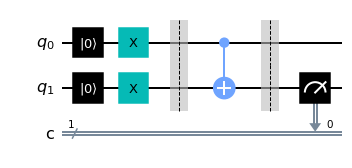

In [35]:
#sample inputs 
for i in ['0','1']:
  for j in ['0','1']:
    qc,output = XOR(i,j)
    print('XOR with inputs',i,j,'gives',output)
    display(qc.draw('mpl'))
    print('\n')

(3) AND gate

In [36]:
#function AND takes 2 inputs as arguments and returns the result of inp1.inp2
def AND(input1, input2):
  #qubit 0 -> input 1
  #qubit 1 -> input 2
  #qubit 2 -> |0⟩
  #output measured from qubit 2

  qc = QuantumCircuit(3,1)  # circuit with 3 qubits and 1 classical bit
  qc.reset(range(3)) 
  #setting input states
  if input1=='1':
    qc.x(0)
  if input2=='1':
    qc.x(1)
  qc.barrier()
  #and gate using double controlled cnot (ccx)- verified using truth table
  ''' AND gate truth table - 
  0 0 -> 0 
  0 1 -> 0 
  1 0 -> 0 
  1 1 -> 1 
  similar to control1 control2 -> target
  '''
  qc.ccx(0,1,2) #control bits q0, q1 targetting qubit q2
  qc.barrier()
  qc.measure(2,0) #measure qubit 2, store value in classical bit c[0]
  backend = Aer.get_backend('aer_simulator')
  job = backend.run(qc, shots=1, memory=True)
  output = job.result().get_memory()[0]
  return qc, output

AND with inputs 0 0 gives output 0


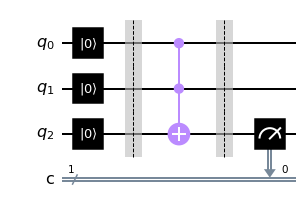



AND with inputs 0 1 gives output 0


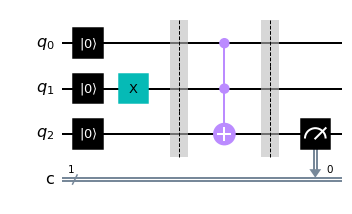



AND with inputs 1 0 gives output 0


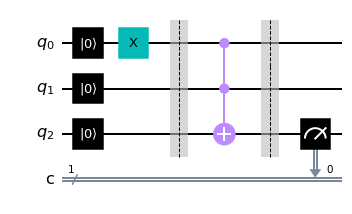



AND with inputs 1 1 gives output 1


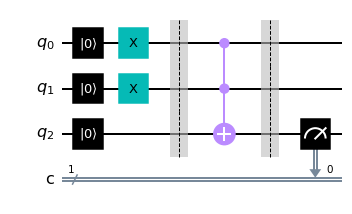

In [37]:
#sample inputs 
for i in ['0','1']:
  for j in ['0','1']:
    qc,output = AND(i,j)
    print('AND with inputs',i,j,'gives output',output)
    display(qc.draw('mpl'))
    print('\n')

(4) NAND Gate

In [12]:
#function takes 2 inputs as arguments and returns nand of the two inputs
def NAND(input1, input2):
  #qubit 0 -> input 1
  #qubit 1 -> input 2
  #qubit 2 -> |0⟩
  #output measured from qubit 2

  qc = QuantumCircuit(3,1)
  qc.reset(range(3))
  #setting input states:
  if input1=='1':
    qc.x(0)
  if input2=='1':
    qc.x(1)
  qc.barrier()
  #nand computation - nand = and + not 
  #and is implemented using ccx and not using x 
  qc.ccx(0,1,2) #control bits - q0, q1 targeting q2
  qc.x(2) #not operation on q2, which had the and value
  qc.barrier()
  qc.measure(2,0) #measure q2, store in c[0]
  backend = Aer.get_backend('aer_simulator')
  job = backend.run(qc,shots=1,memory=True)
  output = job.result().get_memory()[0]
  return qc, output

NAND with inputs 0 0 gives output 1


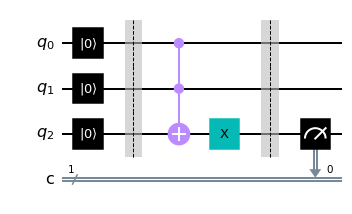



NAND with inputs 0 1 gives output 1


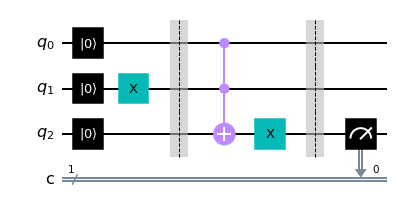



NAND with inputs 1 0 gives output 1


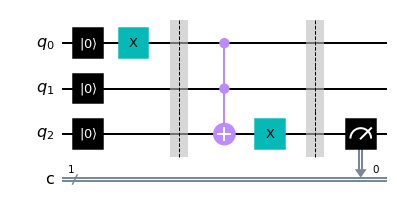



NAND with inputs 1 1 gives output 0


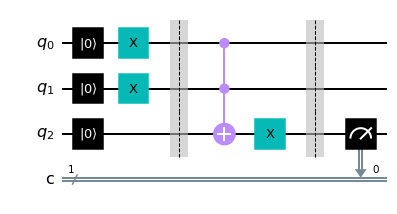

In [13]:
#sample inputs 
for i in ['0','1']:
  for j in ['0','1']:
    qc, output = NAND(i,j)
    print('NAND with inputs',i,j,'gives output',output)
    display(qc.draw('mpl'))
    print('\n')

(5) OR Gate

In [14]:
def OR(input1, input2):
  #qubit 0 -> input 1
  #qubit 1 -> input 2
  #qubit 2 -> |1⟩
  #output measured from qubit 2

  qc = QuantumCircuit(3,1) #circuit with 3 qubits and 1 classical bit
  qc.reset(range(3))
  #setting input states (flip if '0' as state changes only when both inputs are '0', shift control to them)
  if input1=='0':
    qc.x(0)
  if input2=='0':
    qc.x(1)
  qc.x(2) #setting default of q2 as 1 instead of 0
  qc.barrier()
  #OR gate computation: using ccx like AND, but q2 has been set to default '1' instead of '0'
  qc.ccx(0,1,2) #control bits - (flipped if '0') q0,q1 targeting q2 
  #only if q0 and q1 are both 0, q2=0 else, q2=1
  qc.barrier()
  qc.measure(2,0)#measure q2
  backend = Aer.get_backend('aer_simulator')
  job = backend.run(qc, shots=1, memory=True)
  output = job.result().get_memory()[0]
  return qc, output

OR with inputs 0 0 gives output 0


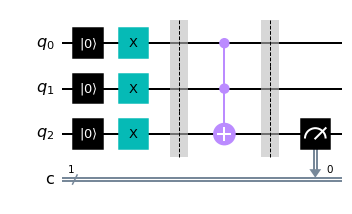



OR with inputs 0 1 gives output 1


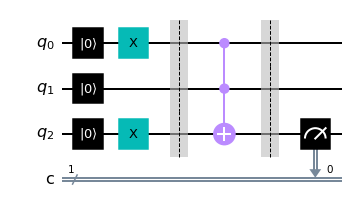



OR with inputs 1 0 gives output 1


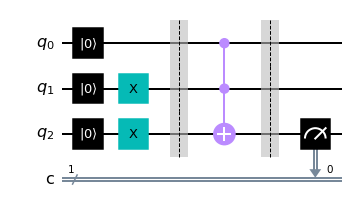



OR with inputs 1 1 gives output 1


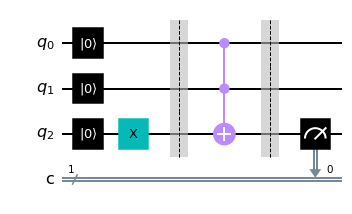

In [15]:
#sample inputs 
for i in ['0','1']:
  for j in ['0','1']:
    qc,output = OR(i,j)
    print('OR with inputs',i,j,'gives output',output)
    display(qc.draw('mpl'))
    print('\n')

####Part 2: AND gate on Quantum Computer

In [17]:
from qiskit import IBMQ #importing IBM quantum computer-simulator
IBMQ.save_account('34cbcfaa2e89af941d928e14957d89a580924a27232310e31922173c2abfd103d935ec2457e0c402c1dfbe093f546ba001225be1a89154865e23c238505a8257')

In [18]:
IBMQ.load_account() #load the account from the saved credentials

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [19]:
IBMQ.providers() #list of providers that I have access for

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

(1) Choosing a device

In [20]:
provider = IBMQ.get_provider('ibm-q')
provider.backends() #list of backends that are made available from the selecter provider

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_oslo') from IBMQ(hub='ibm-q', group='open', project='main')>]

All except the <b>ibmq_qasm_simulator</b> from the above list are real quantum computers. The systems differ in terms of the number of bits, their connectivity and system error rates.

For the AND circuit, a backend with <b> three or more qubits</b> is needed, which is true for all real systems except ibmq_armonk.

In [21]:
backend_ex = provider.get_backend('ibmq_lima') #more info on the selected backend
backend_ex

<IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>

In [22]:
#filtering backends for number of qubits and removing simulators
backends = provider.backends(filters = lambda x:x.configuration().n_qubits >= 2 
                             and not x.configuration().simulator 
                             and x.status().operational==True)
backends

[<IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_oslo') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [23]:
#using least_busy function to choose the backend with the lowest number of jobs in queue.
from qiskit.providers.ibmq import least_busy
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
backend

<IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>

In [24]:
#from the above obtained result, select the least busy quantum computer - ibmq_quito
backend = provider.get_backend('ibmq_quito')

(2) Defining AND function for a real device

(choosing the max number of shots for open IBM systems - 8192 and the number of shots, in order to reduce the variance in the final result)

AND gate


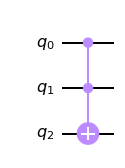


Transpiled AND gate with all the required connectivity


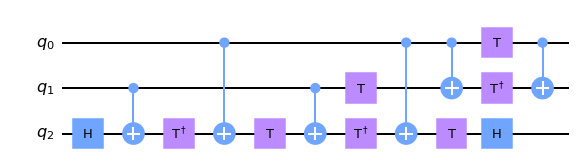

In [25]:
qc_and = QuantumCircuit(3)
qc_and.ccx(0,1,2) #similar to aer_simulator procedure, control qubits q0 and q1 - targeting q2
print('AND gate')
display(qc_and.draw('mpl'))
print('\nTranspiled AND gate with all the required connectivity')
qc_and.decompose().draw('mpl')

For running circuits on real quantum computers, the circuits need to be <b>transpiled</b> for the backend so that only gates that the quantum computer can actually perform are selected. Further, a transpiler can be used to reduce the overall gate count, and subsequently reduce the total length of the input circuits. 

The process generally involves the addition of swap gates so that 2-qubit gates in the circuit map to those pairs of qubits on the device that can actually perform these gates.

Above, the AND gate is decomposed into single and two-qubit gates (only types of gate that can be run on IBM hardware).

Modified AND gate with the addition of the transpile step:

In [26]:
from qiskit.tools.monitor import job_monitor
def AND(inp1, inp2, backend, layout):
  qc = QuantumCircuit(3,1) #circuit with 3 qubits and 1 classical bit 
  qc.reset(range(3))
  #setting the input states:
  if inp1 == '1':
    qc.x(0)
  if inp2 == '1':
    qc.x(1)
  qc.barrier()
  qc.ccx(0,1,2) #and gate with 2 controls q0, q1 targeting q2
  qc.barrier()
  qc.measure(2,0) #measure q2, store in c[0]

  #adding the transpile step:
  #initial_layout - pick the qubits on a device for computation 
  #optimization_level - allows selecting from internal defaults for circuit swap mapping and optimization methods to perform
  qc_trans = transpile(qc, backend, initial_layout=layout, optimization_level=3)
  job = backend.run(qc_trans, shots=8192) #max shots
  print(job.job_id())
  job_monitor(job) #monitor the status of the ibmq instance
  output = job.result().get_counts()
  return qc_trans, output

In [27]:
backend

<IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>

By analyzing the error map, qubit initial layout is determined.

In [28]:
layout = [0,1,3]
#choosing the ones with least H error, CNOT error and Readout error

In [29]:
output_all = []
qc_trans_all = []
prob_all = []

worst = 1 
best = 0
for i in ['0','1']:
  for j in ['0','1']:
    qc_trans, output = AND(i, j, backend, layout)
    output_all.append(output) #list of outputs 
    qc_trans_all.append(qc_trans)
    prob = output[str(int(i=='1' and j=='1'))]/8192  #probability calculation
    prob_all.append(prob)
    print('\nProbability of correct answer for inputs',i,j)
    print('{:.2f}'.format(prob))
    print('-----------------------------------------------')
    worst = min(worst,prob)
    best = max(best,prob)
print('')
print('\nThe highest of these probabilities was {:.2f}'.format(best))
print('The lowest of these probabilities was {:.2f}'.format(worst))

63107dc065fbdd4ad801eebb
Job Status: job has successfully run



Probability of correct answer for inputs 0 0
0.83
-----------------------------------------------
631090f3a7ff8393ee7854e2
Job Status: job has successfully run



Probability of correct answer for inputs 0 1
0.93
-----------------------------------------------
6310a2f519ada7882f04cea0
Job Status: job has successfully run



Probability of correct answer for inputs 1 0
0.92
-----------------------------------------------
6310b52065fbdd464501ef7d
Job Status: job has successfully run



Probability of correct answer for inputs 1 1
0.85
-----------------------------------------------


The highest of these probabilities was 0.93
The lowest of these probabilities was 0.83


(3) Interpretting the obtained results

Factors to consider:
1. <b>circuit depth</b> - proportional to the number of gates in a circuit, and loosely corresponds to the runtime of the circuit in hardware.
2. <b>number of nonlocal(multi-qubit) gates</b> - on ibmq devices, CNOT is the only nonlocal gate. Given that CNOT gates are the most expensive to perform, the total number of these gates is a good benchmark to analyse the accuracy of the final output.

Transpiled AND gate circuit with input 0 0

The circuit depth : 21
No of nonlocal gates : 15
Probability of correct answer : 0.83


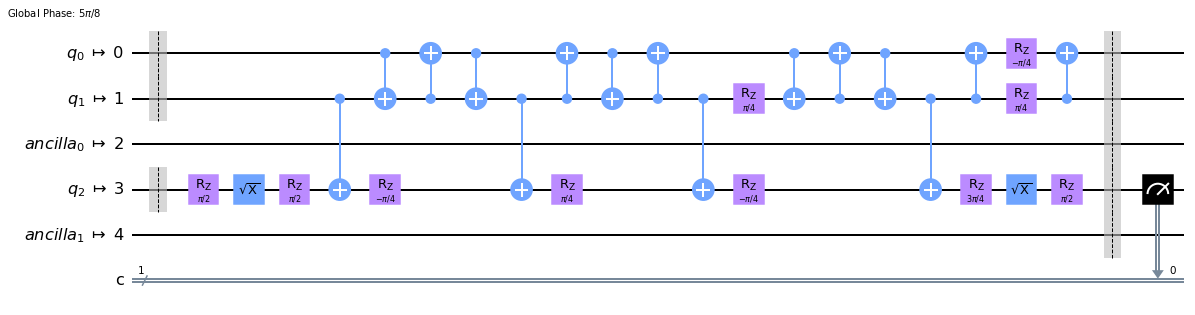

In [30]:
print('Transpiled AND gate circuit with input 0 0')
print('\nThe circuit depth : {}'.format(qc_trans_all[0].depth()))
print('No of nonlocal gates : {}'.format(qc_trans_all[0].num_nonlocal_gates()))
print('Probability of correct answer : {:.2f}'.format(prob_all[0]))
qc_trans_all[0].draw('mpl')

Transpiled AND gate circuit with input 0 1

The circuit depth : 22
No of nonlocal gates : 15
Probability of correct answer : 0.93


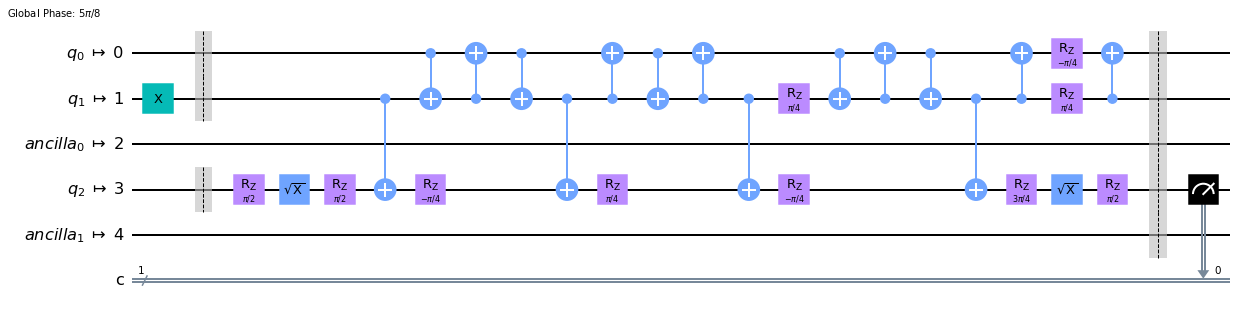

In [31]:
print('Transpiled AND gate circuit with input 0 1')
print('\nThe circuit depth : {}'.format(qc_trans_all[1].depth()))
print('No of nonlocal gates : {}'.format(qc_trans_all[1].num_nonlocal_gates()))
print('Probability of correct answer : {:.2f}'.format(prob_all[1]))
qc_trans_all[1].draw('mpl')

Transpiled AND gate circuit with input 1 0

The circuit depth : 22
No of nonlocal gates : 15
Probability of correct answer : 0.92


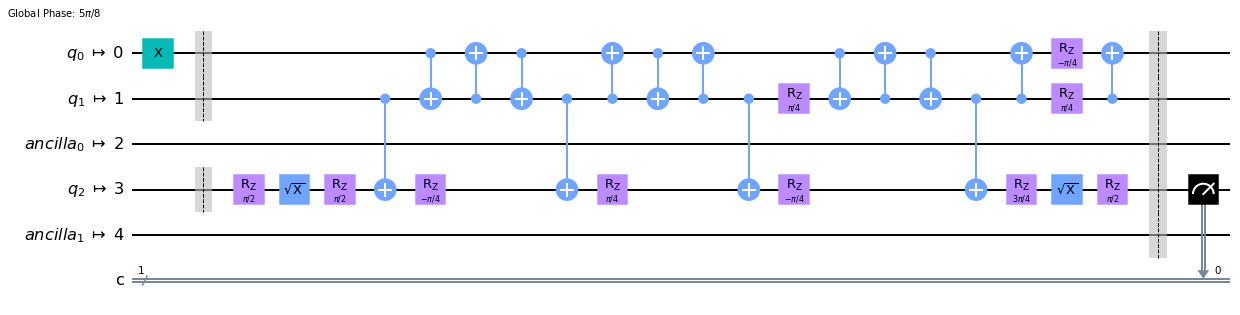

In [32]:
print('Transpiled AND gate circuit with input 1 0')
print('\nThe circuit depth : {}'.format(qc_trans_all[2].depth()))
print('No of nonlocal gates : {}'.format(qc_trans_all[2].num_nonlocal_gates()))
print('Probability of correct answer : {:.2f}'.format(prob_all[2]))
qc_trans_all[2].draw('mpl')

Transpiled AND gate circuit with input 1 1

The circuit depth : 22
No of nonlocal gates : 15
Probability of correct answer : 0.85


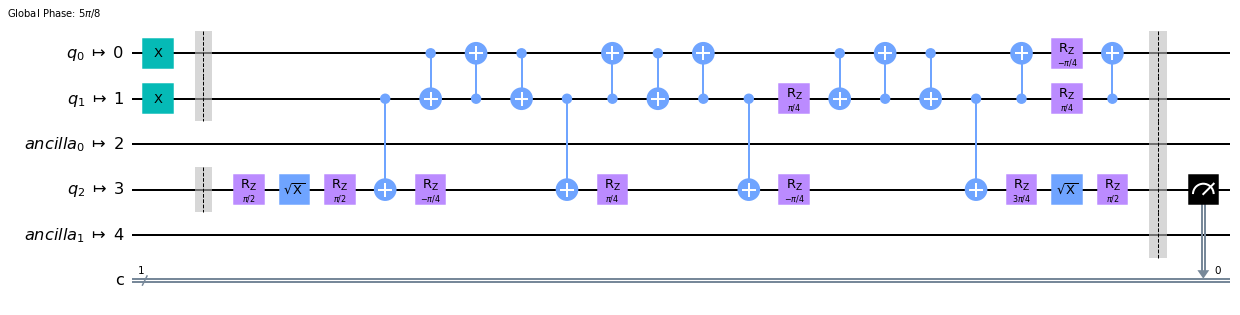

In [33]:
print('Transpiled AND gate circuit with input 1 1')
print('\nThe circuit depth : {}'.format(qc_trans_all[3].depth()))
print('No of nonlocal gates : {}'.format(qc_trans_all[3].num_nonlocal_gates()))
print('Probability of correct answer : {:.2f}'.format(prob_all[3]))
qc_trans_all[3].draw('mpl')

It can be observed that the case with inputs 0-1 and 1-0 have a probability of 0.9 with 22 layers depth and 15 nonlocal gates. The case with 0-0 has a depth of 21 layers as it doesn't require an additional step of flipping any of the input bit's initial state to 1. 